In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv("Classified Data.txt",index_col=0)

df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [2]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

scaler = StandardScaler()
scaler.fit(df.drop('TARGET CLASS',axis=1))

scaled_features = scaler.transform(df.drop('TARGET CLASS',axis=1))

df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


In [3]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.neighbors import KNeighborsClassifier 
from sklearn import metrics

x_train, x_test, y_train, y_test = train_test_split(scaled_features,df['TARGET CLASS'],train_size=0.7,test_size=0.3,random_state=0)
knn =KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)
print(metrics.confusion_matrix(y_test,y_pred))
print(metrics.classification_report(y_test,y_pred,digits=3))

[[125  15]
 [ 16 144]]
              precision    recall  f1-score   support

           0      0.887     0.893     0.890       140
           1      0.906     0.900     0.903       160

    accuracy                          0.897       300
   macro avg      0.896     0.896     0.896       300
weighted avg      0.897     0.897     0.897       300



In [4]:
x_train, x_test, y_train, y_test = train_test_split(scaled_features,df['TARGET CLASS'],train_size=0.7,test_size=0.3,random_state=0)
knn =KNeighborsClassifier(n_neighbors=23)
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)
print(metrics.confusion_matrix(y_test,y_pred))
print(metrics.classification_report(y_test,y_pred,digits=3))

[[126  14]
 [  7 153]]
              precision    recall  f1-score   support

           0      0.947     0.900     0.923       140
           1      0.916     0.956     0.936       160

    accuracy                          0.930       300
   macro avg      0.932     0.928     0.929       300
weighted avg      0.931     0.930     0.930       300



In [9]:
accuracy_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    score = cross_val_score(knn,df_feat,df['TARGET CLASS'],cv=10)
    accuracy_rate.append(score.mean())

print(accuracy_rate)

error_rate = []

for i in range (1,40):

    knn = KNeighborsClassifier(n_neighbors=i)
    score = cross_val_score(knn,df_feat,df['TARGET CLASS'],cv=10)
    error_rate.append(1-score.mean())

print(error_rate)

[np.float64(0.9109999999999999), np.float64(0.909), np.float64(0.9280000000000002), np.float64(0.9339999999999999), np.float64(0.9289999999999999), np.float64(0.929), np.float64(0.9310000000000003), np.float64(0.9340000000000002), np.float64(0.9289999999999999), np.float64(0.9350000000000002), np.float64(0.9329999999999998), np.float64(0.9350000000000002), np.float64(0.937), np.float64(0.9410000000000001), np.float64(0.9390000000000001), np.float64(0.9390000000000001), np.float64(0.9349999999999999), np.float64(0.9360000000000002), np.float64(0.9360000000000002), np.float64(0.9360000000000002), np.float64(0.9339999999999999), np.float64(0.9359999999999999), np.float64(0.93), np.float64(0.933), np.float64(0.9349999999999999), np.float64(0.937), np.float64(0.9380000000000001), np.float64(0.938), np.float64(0.937), np.float64(0.9390000000000001), np.float64(0.9360000000000002), np.float64(0.943), np.float64(0.937), np.float64(0.9390000000000001), np.float64(0.9390000000000001), np.float64

Text(0, 0.5, 'Error Rate')

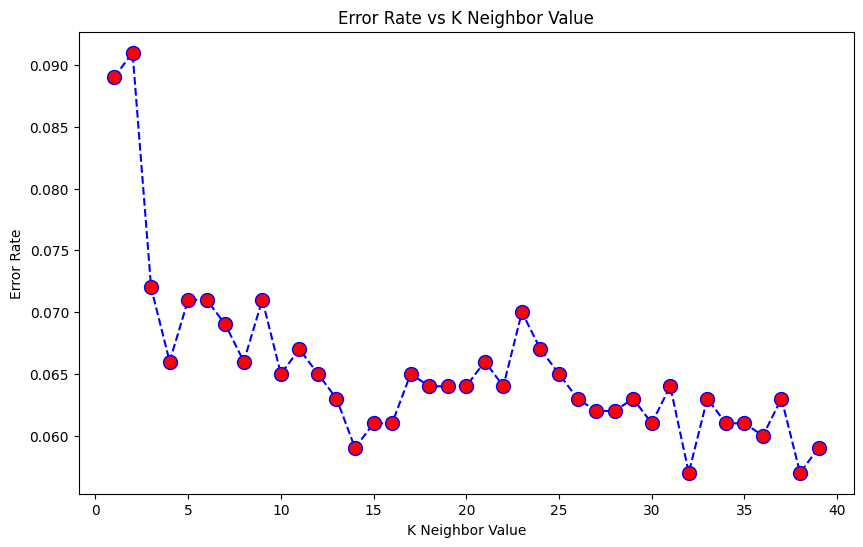

In [6]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color="blue",linestyle='dashed',marker='o',markerfacecolor = "red", markersize=10)
plt.title('Error Rate vs K Neighbor Value')
plt.xlabel('K Neighbor Value')
plt.ylabel('Error Rate')

In [7]:
#Comparing K=1 to K=23

knn1 = KNeighborsClassifier(n_neighbors=1)
knn1.fit(x_train,y_train)
y_pred = knn1.predict(x_test)
print('Results with K=1')
print(metrics.confusion_matrix(y_test,y_pred))
print(metrics.classification_report(y_test,y_pred))

knn23 = KNeighborsClassifier(n_neighbors=23)
knn23.fit(x_train,y_train)
y_pred = knn23.predict(x_test)
print("Results with K=23")
print(metrics.confusion_matrix(y_test,y_pred))
print(metrics.classification_report(y_test,y_pred))

Results with K=1
[[125  15]
 [ 16 144]]
              precision    recall  f1-score   support

           0       0.89      0.89      0.89       140
           1       0.91      0.90      0.90       160

    accuracy                           0.90       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.90      0.90      0.90       300

Results with K=23
[[126  14]
 [  7 153]]
              precision    recall  f1-score   support

           0       0.95      0.90      0.92       140
           1       0.92      0.96      0.94       160

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300

